# 회귀 신경망 빌딩 연습

In [ ]:
# 모형 저장 및 불러오는 코드

# model.save('cnn_model2.h5')

# from tensorflow.keras.models import load_model
# cnn_model2 = load_model('cnn_model2.h5')

# Data and libraries

일관된 결과를 위해 random seed를 0으로 고정한다.


In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
import keras

# version check
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

1.22.4
2.9.1
2.9.0


In [6]:
# data load

from sklearn import datasets
raw_boston = datasets.load_boston()

/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [4]:
# # 오류때문에 때로 가져오기로 한다.

# import pandas as pd
# import numpy as np

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_boston.values[::2, :], raw_boston.values[1::2, :2]])
# target = raw_boston.values[1::2, 2]

# feature and target

In [7]:
X = raw_boston.data
y = raw_boston.target

## feature dimension 

In [8]:
print(X.shape)

(506, 13)


## target data classes

타깃 데이터 종류를 확인하는 것으로 분류 문제인지 회귀 문제인지 구분할 수 있다. 연속형 숫자이기 때문에 회귀문제로 해결해야 함을 알 수 있다.

In [9]:
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

## Training/Test Data split

In [11]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Building Perceptron (오류 및 해결 포함)

In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [13]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 13개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat, activation = 'relu')) # add로 입력층 추가, *input_dim = 피처 개수, 20은 output 차원, 활성화 함수를 한 줄에 넣음.
model.add(Dense(1))                 # 최종 아웃풋 층. 회귀문제로 1개의 노드로 출력되도록 한다. 
                                    # 회귀때 최종 활성화 함수를 선형 함수를 사용해야 하는데, 코드에서 지정하지 않으면 선형 함수가 적용된다.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## model compile

In [15]:
model.compile(loss = 'mean_squared_error',         # 손실함수: 회귀 문제이기 때문에 MSE를 사용
              optimizer = 'adam',                  # 옵티마이저와 평가 기준
              metrics = ['mean_squared_error'])

## model learning

In [16]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 5)  # batch_size: learning mini batch size at one ephoch

Epoch 1/30
76/76 [==============================] - 1s 3ms/step - loss: 474.8179 - mean_squared_error: 474.8179
Epoch 2/30
76/76 [==============================] - 0s 2ms/step - loss: 97.4737 - mean_squared_error: 97.4737
Epoch 3/30
76/76 [==============================] - 0s 3ms/step - loss: 81.1661 - mean_squared_error: 81.1661
Epoch 4/30
76/76 [==============================] - 0s 4ms/step - loss: 72.6059 - mean_squared_error: 72.6059
Epoch 5/30
76/76 [==============================] - 0s 2ms/step - loss: 63.1071 - mean_squared_error: 63.1071
Epoch 6/30
76/76 [==============================] - 0s 2ms/step - loss: 57.3056 - mean_squared_error: 57.3056
Epoch 7/30
76/76 [==============================] - 0s 2ms/step - loss: 53.3248 - mean_squared_error: 53.3248
Epoch 8/30
76/76 [==============================] - 0s 3ms/step - loss: 48.0305 - mean_squared_error: 48.0305
Epoch 9/30
76/76 [==============================] - 0s 2ms/step - loss: 44.4123 - mean_squared_error: 44.4123
Epoch 10

# evaluation

MSE를 사용하기로 했기 때문에 MSE가 출력된다.

In [17]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

12/12 [==============================] - 0s 1ms/step - loss: 51.5557 - mean_squared_error: 51.5557
51.55571365356445
4/4 [==============================] - 0s 2ms/step - loss: 73.9725 - mean_squared_error: 73.9725
73.97251892089844


~~나 뭐 잘못했냐 뭐가 이렇게 에러가 커...~~

## MSE and loss rate

In [18]:
import numpy as np
epoch = np.arange(1, epo +1)               # x축 설정
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [19]:
mse = hist.history['mean_squared_error']   # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
print(mse)

[474.81793212890625, 97.47374725341797, 81.16606903076172, 72.60585021972656, 63.10710144042969, 57.30558776855469, 53.324832916259766, 48.03047561645508, 44.41233444213867, 44.62455749511719, 39.8853874206543, 37.46774673461914, 37.2100830078125, 34.65799331665039, 35.224021911621094, 37.256954193115234, 36.62009811401367, 35.41062545776367, 33.9078254699707, 34.47385025024414, 36.57753372192383, 35.87947082519531, 34.44246292114258, 35.378902435302734, 33.26034927368164, 36.97323989868164, 31.00062370300293, 34.85821533203125, 32.477012634277344, 31.690677642822266]


In [20]:
loss = hist.history['loss']               # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
print(loss)

[474.81793212890625, 97.47374725341797, 81.16606903076172, 72.60585021972656, 63.10710144042969, 57.30558776855469, 53.324832916259766, 48.03047561645508, 44.41233444213867, 44.62455749511719, 39.8853874206543, 37.46774673461914, 37.2100830078125, 34.65799331665039, 35.224021911621094, 37.256954193115234, 36.62009811401367, 35.41062545776367, 33.9078254699707, 34.47385025024414, 36.57753372192383, 35.87947082519531, 34.44246292114258, 35.378902435302734, 33.26034927368164, 36.97323989868164, 31.00062370300293, 34.85821533203125, 32.477012634277344, 31.690677642822266]


## MSE and loss rate visualization

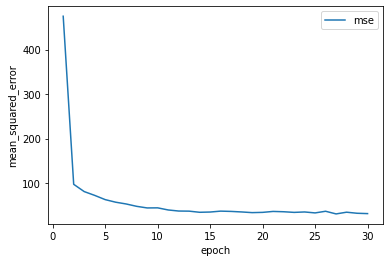

In [21]:
import matplotlib.pyplot as plt

plt.plot(epoch, mse, label = 'mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

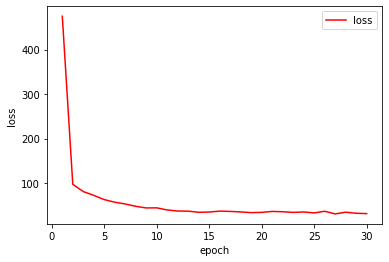

In [22]:
plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()